# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# Read csv file

In [2]:
data=pd.read_csv('C:/Users/F/Downloads/1312_2368_compressed_diamonds.csv/diamonds.csv')
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Get information about data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


# Get a shape of dataset

In [4]:
data.shape

(53940, 11)

# Delete unnamed column

In [5]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

# Again get information about data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


# Check the data for missing values

In [7]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# There are no missing values in the data, but there values equal to zero in the columns 'x', 'y', 'z' and we must remove them

In [9]:
print("The number of rows with a value of 0 for x are ",(data["x"]==0).sum(),".")
print("The number of rows with a value of 0 for y are ",(data["y"]==0).sum(),".")
print("The number of rows with a value of 0 for z are ",(data["z"]==0).sum(),".")
print("The total number of rows with a value of 0 are ",((data["x"]==0)|(data["y"]==0)|(data["z"]==0)).sum(),".")

The number of rows with a value of 0 for x are  8 .
The number of rows with a value of 0 for y are  7 .
The number of rows with a value of 0 for z are  20 .
The total number of rows with a value of 0 are  20 .


In [10]:
data = data[(data[['x','y','z']] != 0).all(axis=1)]
data.shape

(53920, 10)

# Encoding categorical features

In [11]:
print(data['cut'].unique(), data['clarity'].unique(), data['color'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair'] ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF'] ['E' 'I' 'J' 'H' 'F' 'G' 'D']


In [12]:
Cut_value = {'Fair':0,'Good':1,'Very Good':2,'Premium':3,'Ideal':4}
data['cut'] = data['cut'].replace(Cut_value)

Color_value = {'J':0,'I':1,'H':2,'G':3,'F':4,'E':5,'D':6}
data['color'] = data['color'].replace(Color_value)

Clarity_value = {'I1':0,'SI2':1,'SI1':2,'VS2':3,'VS1':4,'VVS2':5,'VVS1':6,'IF':7}
data['clarity'] = data['clarity'].replace(Clarity_value)

In [13]:
print(data['cut'].unique(), data['clarity'].unique(), data['color'].unique())

[4 3 1 2 0] [1 2 4 3 5 6 0 7] [5 1 0 2 4 3 6]


# Calculating correlation in data

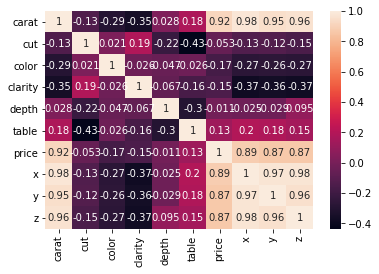

In [14]:
sns.heatmap(data.corr(), annot=True)

# Preparing data for training

In [15]:
from sklearn.model_selection import train_test_split
X=data.drop(['price'], axis=1)
y=data['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

# Model creation

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [17]:
Linearmodel=LinearRegression().fit(X_train,y_train)
y_pred1=Linearmodel.predict(X_test)
mse = mean_squared_error(y_test, y_pred1)
mae = mean_absolute_error(y_test, y_pred1)
rmse = mean_squared_error(y_test, y_pred1)**0.5
r2 = r2_score(y_test, y_pred1)

# Quality of a linear regression model (90%)

In [18]:
print(mse, mae, rmse, r2)

1432691.7911378513 792.7719874901425 1196.9510395742388 0.907415879685527


In [19]:
Polynomialmodel=PolynomialFeatures(degree=2)
X2_train=Polynomialmodel.fit_transform(X_train)
X2_test=Polynomialmodel.transform(X_test)

Linearmodel2=LinearRegression().fit(X2_train,y_train)

y_pred2=Linearmodel2.predict(X2_test)
mse = mean_squared_error(y_test, y_pred2)
mae = mean_absolute_error(y_test, y_pred2)
rmse = mean_squared_error(y_test, y_pred2)**0.5
r2 = r2_score(y_test, y_pred2)

# Quality of a polynomial regression model (97%)

In [20]:
print( mse, mae, rmse, r2)

534784.6329708463 445.31957935088053 731.2897052269 0.9654408819066513
